In [325]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [326]:
train = pd.read_csv('~/Downloads/Train_aBjfeNk.csv')
test = pd.read_csv('~/Downloads/Test_LqhgPWU.csv')

In [327]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [328]:
comb = pd.concat([train,test],ignore_index=True)
comb.head(20)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [329]:
comb.Var_1.value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64

In [330]:
comb.shape

(10695, 11)

In [331]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [332]:
tbl  =  pd.crosstab(train.Spending_Score,train.Segmentation)
tbl

Segmentation,A,B,C,D
Spending_Score,,,,
Average,343,590,903,138
High,271,384,405,156
Low,1358,884,662,1974


In [333]:
import scipy.stats as stats 

In [334]:
tstats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(tstats,pvalue)

1516.8787583775006 0.0


In [335]:
pd.DataFrame(comb.groupby('Segmentation')['Spending_Score'].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

* **c** segment has the highest no of **high spender**
* **d** segment has the highest no of **low spender**
* where the **maximum average spender** - **c**

note : clusters counts will be 4 in data set 

In [336]:
comb['Family_Size'].value_counts()

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

In [337]:
mapped  =  {'D':0,'A':1,'B':2,'C':3}
comb['Segmentation'] = comb.Segmentation.map(mapped)

In [338]:
import seaborn as sns 

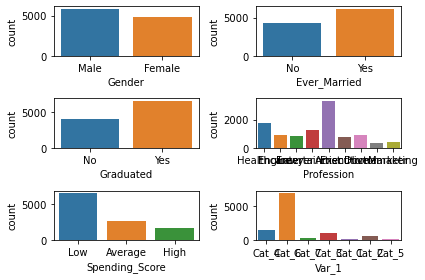

In [339]:
# univariat and bivariat

cols = ['Gender','Ever_Married','Graduated',
       'Profession','Spending_Score','Var_1']
a =3
b = 2
c =1
for i in cols:
    plt.subplot(a,b,c)
    sns.countplot(comb.loc[:,i])
    c+=1
plt.tight_layout()
plt.show()

* more males than females followed by graduation  = yes
* most of the people are married and mostly artists followed by healthcare 

* Most of the People in the Data are low spenders

* Highest Freq of Var1 is Cat 6 followed by Cat 4, Cat3 and Cat 2

In [340]:
comb.select_dtypes(np.number).columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'], dtype='object')

<AxesSubplot:>

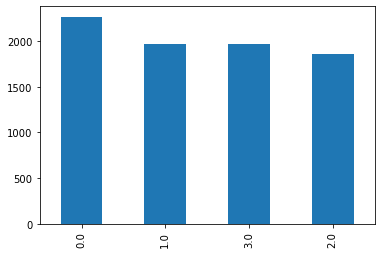

In [341]:
comb.Segmentation.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Age', ylabel='Density'>

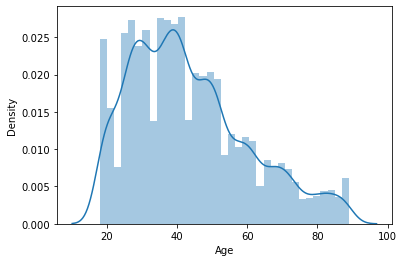

In [342]:
sns.distplot(comb.Age)

In [343]:
comb['Age'].value_counts()

35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

In [344]:
#lets describe the segmentation and spending score based on age 
comb.groupby(['Spending_Score','Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

In [345]:
# * check anova 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [346]:
model = ols('Age~Segmentation',data = train).fit()
anova_lm(model)
# age is significant for thr target 

,df,sum_sq,mean_sq,F,PR(>F)
Segmentation,3.0,3.396070e+05,113202.343669,477.102025,2.188783e-285
Residual,8064.0,1.913351e+06,237.270726,NaN,NaN


In [347]:
# lets deal age 
comb.loc[(comb.Age<= 25)& (comb.Age>=18),'Age_category']=1
comb.loc[(comb.Age<= 30)& (comb.Age>=25),'Age_category']=2
comb.loc[(comb.Age<= 40)& (comb.Age>=30),'Age_category']=3
comb.loc[(comb.Age<= 50)& (comb.Age>=40),'Age_category']=4
comb.loc[(comb.Age>50),'Age_category']=5



In [348]:
comb.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_category          0
dtype: int64

In [349]:
comb[comb['Ever_Married']=='No'].describe()

,ID,Age,Work_Experience,Family_Size,Segmentation,Age_category
count,4342.000000,4342.000000,3914.000000,4098.000000,3285.000000,4342.000000
mean,463381.269231,32.165131,3.025805,2.992679,0.898935,2.584984
std,2590.809525,10.710496,3.676838,1.761034,1.053451,1.162073
min,458985.000000,18.000000,0.000000,1.000000,0.000000,1.000000
25%,461118.250000,25.000000,0.000000,1.000000,0.000000,2.000000
50%,463307.500000,30.000000,1.000000,3.000000,1.000000,3.000000
75%,465695.750000,38.000000,6.000000,4.000000,2.000000,3.000000
max,467974.000000,89.000000,14.000000,9.000000,3.000000,5.000000


In [350]:
comb.groupby(['Ever_Married','Spending_Score'])['Age'].describe()

count       mean        std   min   25%   50%  \
Ever_Married Spending_Score                                                   
No           Low             4342.0  32.165131  10.710496  18.0  25.0  30.0   
Yes          Average         2547.0  46.888104  11.284076  18.0  39.0  46.0   
             High            1551.0  58.604126  17.465670  18.0  45.0  59.0   
             Low             2065.0  52.010169  16.610926  18.0  39.0  49.0   

                              75%   max  
Ever_Married Spending_Score              
No           Low             38.0  89.0  
Yes          Average         55.0  89.0  
             High            73.0  89.0  
             Low             63.0  89.0

In [351]:
comb['Ever_Married'] = comb.Ever_Married.fillna('unk')
comb['Graduated'] = comb.Graduated.fillna('unk')
comb['Profession'] = comb.Profession.fillna('unk')
comb['Work_Experience'] = comb.Work_Experience.fillna(-1)
comb['Family_Size'] = comb.Family_Size.fillna(-1)
comb['Var_1'] = comb.Var_1.fillna('unk')
# comb['Ever_Married'] = comb.Ever_Married.fillna('unk')


In [352]:
comb.Var_1.value_counts()

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
unk       108
Name: Var_1, dtype: int64

In [353]:
comb

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_category
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0,1.0
1,462643,Female,Yes,38,Yes,Engineer,-1.0,Average,3.0,Cat_4,1.0,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0,5.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0,5.0
4,462669,Female,Yes,40,Yes,Entertainment,-1.0,High,6.0,Cat_6,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN,2.0
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN,3.0
10692,467960,Female,No,53,Yes,Entertainment,-1.0,Low,2.0,Cat_6,NaN,5.0
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN,4.0


In [354]:
comb['Gender'] = comb.Gender.map({'Male':1,'Female':2})
comb['Ever_Married'] = comb.Ever_Married.map({'No':1,'Yes':2,'unk':3})
comb['Graduated'] = comb.Graduated.map({'No':1,'Yes':2,'unk':3})
comb['Spending_Score'] = comb.Spending_Score.map({'Low':1,'Average':2,'High':3})
comb['Var_1'] = comb.Var_1.map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7,'unk':8})

In [355]:
comb

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_category
0,462809,1,1,22,1,Healthcare,1.0,1,4.0,4,0.0,1.0
1,462643,2,2,38,2,Engineer,-1.0,2,3.0,4,1.0,3.0
2,466315,2,2,67,2,Engineer,1.0,1,1.0,6,2.0,5.0
3,461735,1,2,67,2,Lawyer,0.0,3,2.0,6,2.0,5.0
4,462669,2,2,40,2,Entertainment,-1.0,3,6.0,6,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,Healthcare,9.0,1,4.0,6,NaN,2.0
10691,467958,2,1,35,2,Doctor,1.0,1,1.0,6,NaN,3.0
10692,467960,2,1,53,2,Entertainment,-1.0,1,2.0,6,NaN,5.0
10693,467961,1,2,47,2,Executive,1.0,3,5.0,4,NaN,4.0


In [356]:
comb['Profession'] = comb.Profession.map({'Artist':1,'Healthcare':2,'Entertainment':3,'Engineer':4,'Doctor':5,'Lawyer':6,'Executive':7,'Marketing':8,'Homemaker':9,'unk':10})

In [357]:
comb.loc[comb.Family_Size<=2,'Family_Cat'] =1
comb.loc[(comb.Family_Size>2)&(comb.Family_Size<=5),'Family_Cat'] = 2
comb.loc[(comb.Family_Size>5),'Family_Cat'] = 3

In [358]:
comb.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_category,Family_Cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1.0,2.0
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3.0,2.0
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5.0,1.0
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5.0,1.0
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,4.0,3.0
5,461319,1,2,56,1,1,0.0,2,2.0,6,3.0,5.0,1.0
6,460156,1,1,32,2,2,1.0,1,3.0,6,3.0,3.0,2.0
7,464347,2,1,33,2,2,1.0,1,3.0,6,0.0,3.0,2.0
8,465015,2,2,61,2,4,0.0,1,3.0,7,0.0,5.0,2.0
9,465176,2,2,55,2,1,1.0,2,4.0,6,3.0,5.0,2.0


In [359]:
comb.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_category          0
Family_Cat            0
dtype: int64

In [360]:
comb.groupby(['Spending_Score','Work_Experience'])['Age'].describe()

count       mean        std   min    25%  \
Spending_Score Work_Experience                                              
1              -1.0              626.0  38.746006  17.492884  18.0  27.00   
                0.0             1874.0  39.653148  17.052392  18.0  27.00   
                1.0             1814.0  40.382029  17.429715  18.0  27.00   
                2.0              216.0  38.407407  15.840212  18.0  26.00   
                3.0              203.0  36.812808  14.000864  18.0  27.00   
                4.0              204.0  37.377451  13.759714  18.0  27.00   
                5.0              166.0  35.331325  11.721717  18.0  27.00   
                6.0              175.0  35.942857  11.454415  18.0  27.00   
                7.0              157.0  35.063694  13.163022  18.0  26.00   
                8.0              411.0  34.523114  10.154241  18.0  27.00   
                9.0              417.0  35.901679  11.289990  18.0  28.00   
                10.0              54.0  34.481481   9.803235  18.0  27.25   
                11.0              37.0  34.918919   8.648630  18.0  29.00   
                12.0              41.0  35.512195   7.861685  18.0  30.00   
                13.0              46.0  35.652174  14.408666  18.0  26.00   
                14.0              53.0  33.433962   8.337841  18.0  27.00   
2              -1.0              269.0  45.338290  11.426634  18.0  37.00   
                0.0              733.0  48.656207  11.290946  25.0  40.00   
                1.0              789.0  48.945501  11.213132  18.0  41.00   
                2.0              109.0  47.330275  10.822691  27.0  40.00   
                3.0               88.0  45.193182   9.710591  25.0  39.00   
                4.0               99.0  46.020202  10.241950  25.0  39.00   
                5.0               61.0  44.147541   9.352069  26.0  38.00   
                6.0               64.0  45.593750  13.372227  25.0  37.75   
                7.0               63.0  44.142857  10.062478  25.0  36.00   
                8.0              140.0  42.450000  10.841782  20.0  36.00   
                9.0              134.0  41.574627   9.813583  25.0  35.00   
                10.0               6.0  43.500000   7.968689  33.0  38.50   
                11.0              17.0  41.176471  10.284912  25.0  37.00   
                12.0              13.0  37.692308   6.447023  26.0  35.00   
                13.0               4.0  41.750000  11.757976  28.0  34.75   
                14.0              10.0  39.000000   8.286535  27.0  33.00   
3              -1.0              203.0  57.862069  18.679970  18.0  41.00   
                0.0              480.0  62.547917  16.840334  18.0  49.00   
                1.0              524.0  61.925573  16.530527  21.0  49.00   
                2.0               48.0  53.354167  16.806141  19.0  41.25   
                3.0               46.0  54.065217  16.136091  25.0  42.00   
                4.0               43.0  47.627907  12.852688  25.0  36.00   
                5.0               43.0  49.395349  15.516718  26.0  38.50   
                6.0               26.0  42.653846  15.458182  18.0  36.00   
                7.0               36.0  47.944444  16.177488  23.0  37.75   
                8.0               61.0  47.393443  16.246311  22.0  36.00   
                9.0               62.0  43.532258  12.827631  26.0  35.00   
                10.0               4.0  33.750000   8.301606  27.0  27.75   
                11.0              10.0  49.800000  13.669105  33.0  41.00   
                12.0               6.0  44.333333  18.228183  25.0  33.50   
                13.0               7.0  41.857143  18.818684  29.0  31.50   
                14.0               3.0  55.000000  25.632011  28.0  43.00   

                                 50%    75%   max  
Spending_Score Work_Experience                     
1              -1.0             33.0  46.00  89.0  
                0.0       

In [361]:
comb.loc[comb.Work_Experience<=0,'Work_cat'] =0
comb.loc[(comb.Work_Experience>=0)&(comb.Work_Experience<=2),'Work_cat'] =1
comb.loc[(comb.Work_Experience>=2)&(comb.Work_Experience<=5),'Work_cat'] = 2
comb.loc[(comb.Work_Experience>=5)&(comb.Work_Experience<=10),'Work_cat'] = 3
comb.loc[(comb.Work_Experience>10),'Work_cat'] = 4

In [362]:
# comb.drop('Work_Cat',axis = 1,inplace = True)

In [363]:
comb

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_category,Family_Cat,Work_cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1.0,2.0,1.0
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3.0,2.0,0.0
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5.0,1.0,1.0
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5.0,1.0,1.0
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2.0,2.0,3.0
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3.0,1.0,1.0
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5.0,1.0,0.0
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4.0,2.0,1.0


In [364]:
x['Work_cat'].isnull().sum()

286

In [365]:
temp=comb.groupby('Age').agg({'Spending_Score':['count','min','mean','max'],'Family_Cat':['count','min','max'],
                             'Work_Experience':['count','min','mean','max'],'Profession':['count','min','max'],
                                  'Var_1':['count','min','max']})

In [315]:
temp.columns=['_'.join(x) for x in temp.columns]

In [261]:
new=pd.merge(left=comb,right=temp,on='Age',how='left')

In [262]:
#split the data in train and test
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [263]:
x=newtrain.drop(['ID','Segmentation'],axis=1)
y=newtrain.Segmentation
newtest=newtest.drop(['ID','Segmentation'],axis=1)

In [264]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=420)
x['clusters']=kmeans.fit_predict(x)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values